In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import os  
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter

## Data Exploration 

In [2]:
raw_path = '../data/raw/bot_detection_data.csv'

In [3]:
data = pd.read_csv(raw_path)

In [4]:
data.head()

,User ID,Username,Tweet,Retweet Count,Mention Count,Follower Count,Verified,Bot Label,Location,Created At,Hashtags
0,132131,flong,Station activity person against natural majori...,85,1,2353,False,1,Adkinston,2020-05-11 15:29:50,NaN
1,289683,hinesstephanie,Authority research natural life material staff...,55,5,9617,True,0,Sanderston,2022-11-26 05:18:10,both live
2,779715,roberttran,Manage whose quickly especially foot none to g...,6,2,4363,True,0,Harrisonfurt,2022-08-08 03:16:54,phone ahead
3,696168,pmason,Just cover eight opportunity strong policy which.,54,5,2242,True,1,Martinezberg,2021-08-14 22:27:05,ever quickly new I
4,704441,noah87,Animal sign six data good or.,26,3,8438,False,1,Camachoville,2020-04-13 21:24:21,foreign mention


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User ID         50000 non-null  int64 
 1   Username        50000 non-null  object
 2   Tweet           50000 non-null  object
 3   Retweet Count   50000 non-null  int64 
 4   Mention Count   50000 non-null  int64 
 5   Follower Count  50000 non-null  int64 
 6   Verified        50000 non-null  bool  
 7   Bot Label       50000 non-null  int64 
 8   Location        50000 non-null  object
 9   Created At      50000 non-null  object
 10  Hashtags        41659 non-null  object
dtypes: bool(1), int64(5), object(5)
memory usage: 3.9+ MB


In [6]:
data.shape

(50000, 11)

In [7]:
data.describe()

,User ID,Retweet Count,Mention Count,Follower Count,Bot Label
count,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,548890.680540,50.00560,2.513760,4988.602380,0.500360
std,259756.681425,29.18116,1.708563,2878.742898,0.500005
min,100025.000000,0.00000,0.000000,0.000000,0.000000
25%,323524.250000,25.00000,1.000000,2487.750000,0.000000
50%,548147.000000,50.00000,3.000000,4991.500000,1.000000
75%,772983.000000,75.00000,4.000000,7471.000000,1.000000
max,999995.000000,100.00000,5.000000,10000.000000,1.000000


In [8]:
data.isna().sum()

User ID              0
Username             0
Tweet                0
Retweet Count        0
Mention Count        0
Follower Count       0
Verified             0
Bot Label            0
Location             0
Created At           0
Hashtags          8341
dtype: int64

In [9]:
data["Bot Label"].value_counts()

1    25018
0    24982
Name: Bot Label, dtype: int64

In [10]:
data["Username"].nunique()

40566

In [11]:
data["User ID"].nunique() 

50000

In [12]:
data["Verified"].value_counts()

True     25004
False    24996
Name: Verified, dtype: int64

In [13]:
data["Location"].nunique()

25199

In [14]:
data["Created At"] = pd.to_datetime(data["Created At"])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   User ID         50000 non-null  int64         
 1   Username        50000 non-null  object        
 2   Tweet           50000 non-null  object        
 3   Retweet Count   50000 non-null  int64         
 4   Mention Count   50000 non-null  int64         
 5   Follower Count  50000 non-null  int64         
 6   Verified        50000 non-null  bool          
 7   Bot Label       50000 non-null  int64         
 8   Location        50000 non-null  object        
 9   Created At      50000 non-null  datetime64[ns]
 10  Hashtags        41659 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(5), object(4)
memory usage: 3.9+ MB


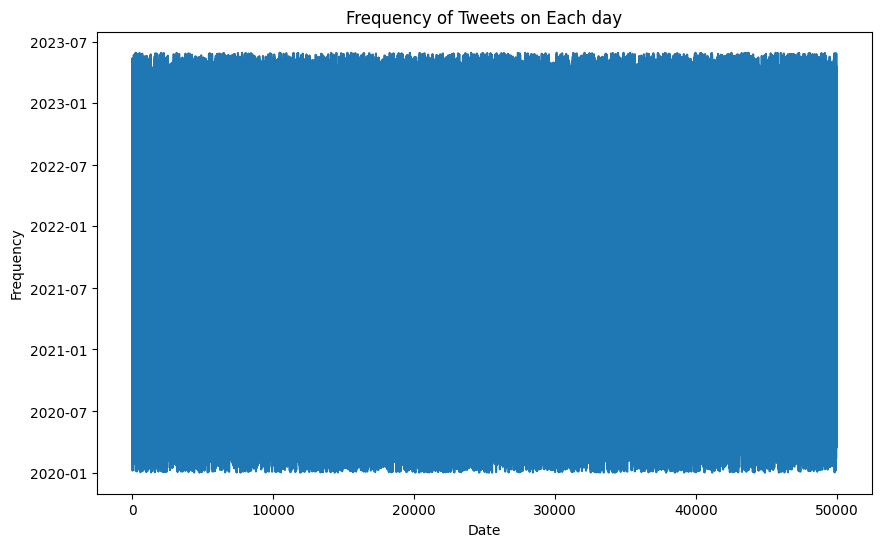

In [16]:
data['Created At'].plot(figsize=(10, 6), kind='line')
plt.title('Frequency of Tweets on Each day')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

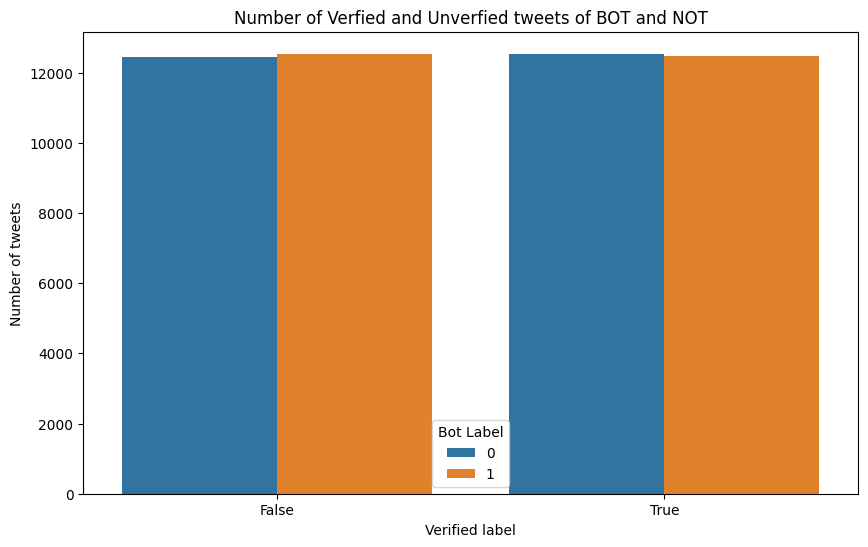

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='Verified', hue = 'Bot Label', data = data)
plt.title("Number of Verfied and Unverfied tweets of BOT and NOT")
plt.xlabel("Verified label")
plt.ylabel("Number of tweets")
plt.show()

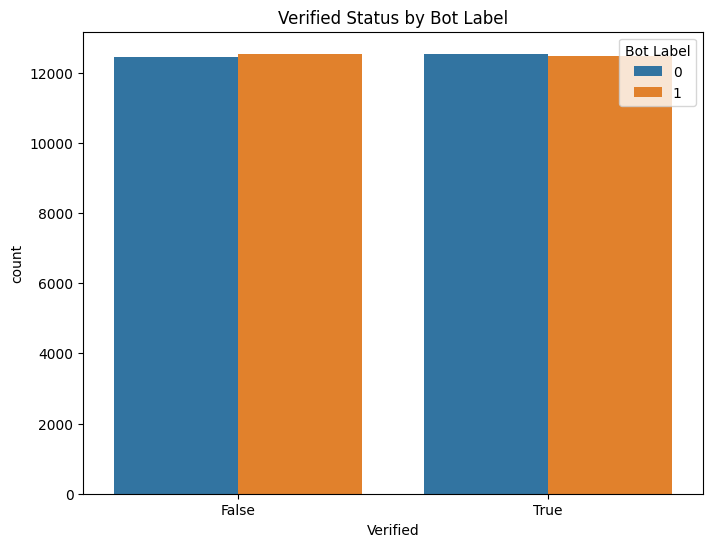

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Verified', hue='Bot Label', data=data)
plt.title('Verified Status by Bot Label')
plt.show()

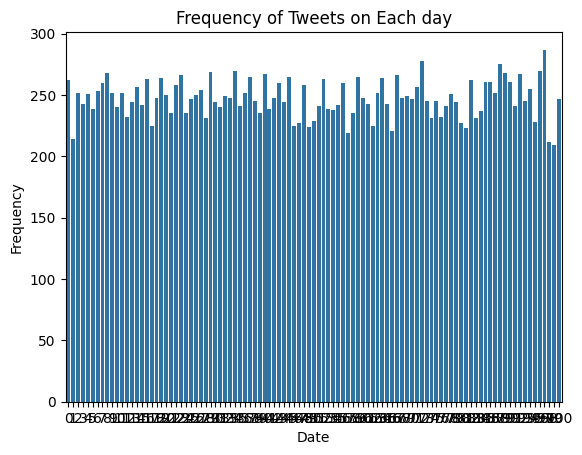

In [19]:
sns.countplot(x='Retweet Count', data=data[data['Bot Label']==0], order=sorted(data['Retweet Count'].unique()))
plt.title('Frequency of Tweets on Each day')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

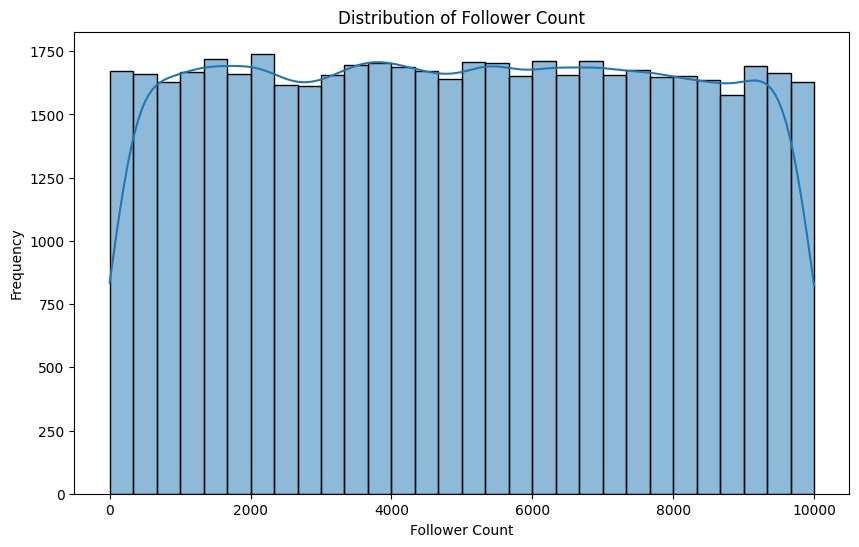

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Follower Count'], kde=True, bins=30)
plt.title('Distribution of Follower Count')
plt.xlabel('Follower Count')
plt.ylabel('Frequency')
plt.show()


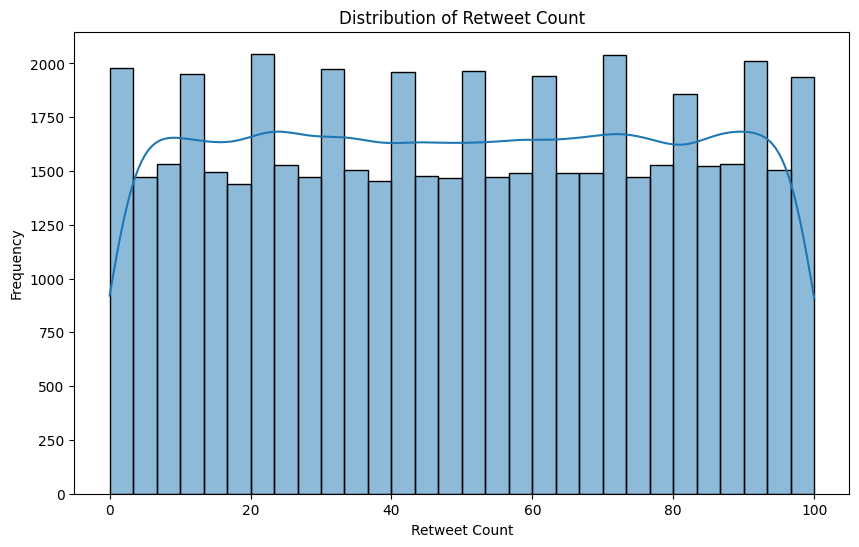

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Retweet Count'], kde=True, bins=30)
plt.title('Distribution of Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Frequency')
plt.show()


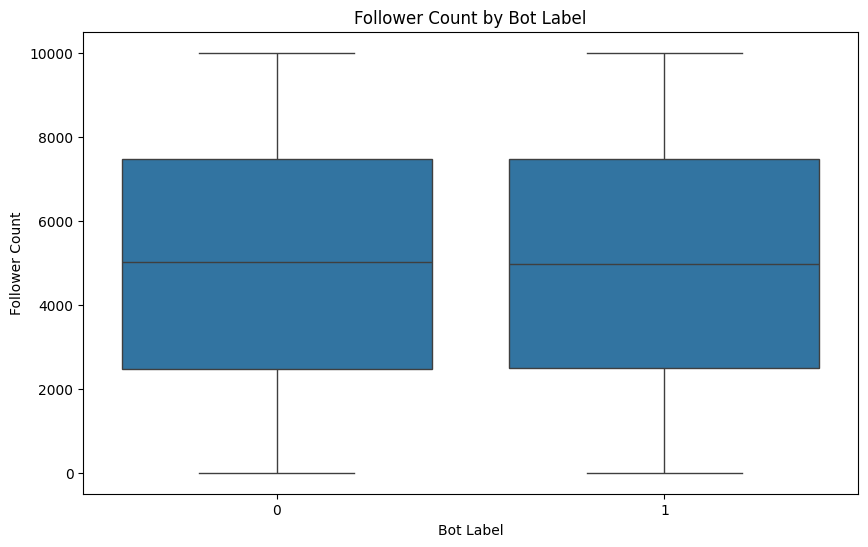

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bot Label', y='Follower Count', data=data)
plt.title('Follower Count by Bot Label')
plt.show()


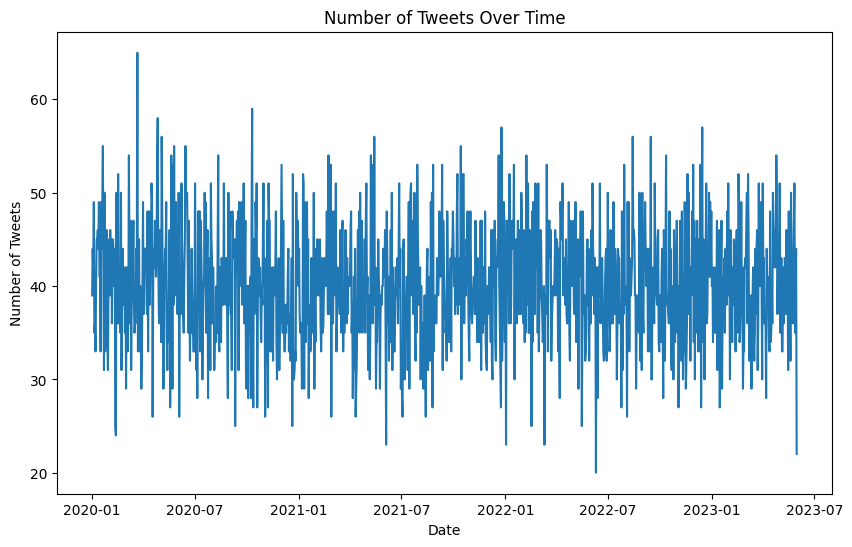

In [23]:
plt.figure(figsize=(10, 6))
data['Created At'].groupby(data['Created At'].dt.date).count().plot(kind='line')
plt.title('Number of Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()


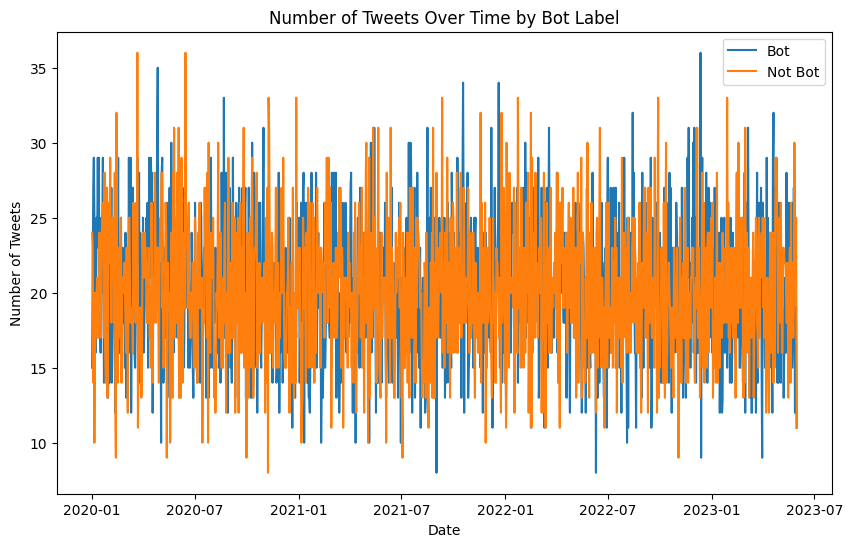

In [24]:
plt.figure(figsize=(10, 6))
data[data['Bot Label'] == 1]['Created At'].groupby(data['Created At'].dt.date).count().plot(kind='line', label='Bot')
data[data['Bot Label'] == 0]['Created At'].groupby(data['Created At'].dt.date).count().plot(kind='line', label='Not Bot')
plt.title('Number of Tweets Over Time by Bot Label')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend()
plt.show()


## Analyzing the Text Data

In [25]:
data['Hashtags'] = data['Hashtags'].fillna('')

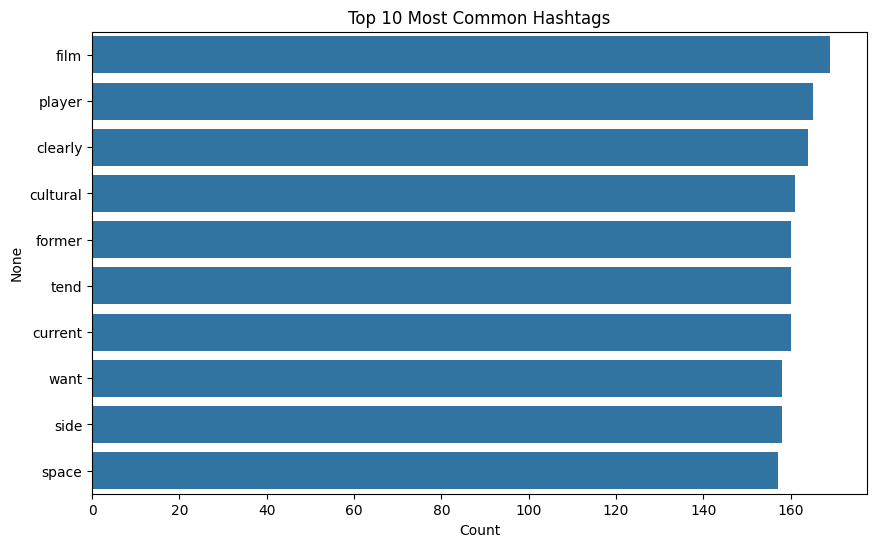

In [26]:
hashtags = data['Hashtags'].str.split(expand=True).stack().value_counts()

# Plot the top 10 most common hashtags
plt.figure(figsize=(10, 6))
sns.barplot(x=hashtags.head(10).values, y=hashtags.head(10).index, orient='h')
plt.title('Top 10 Most Common Hashtags')
plt.xlabel('Count')
plt.show()

/tmp/ipykernel_34955/914480371.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')


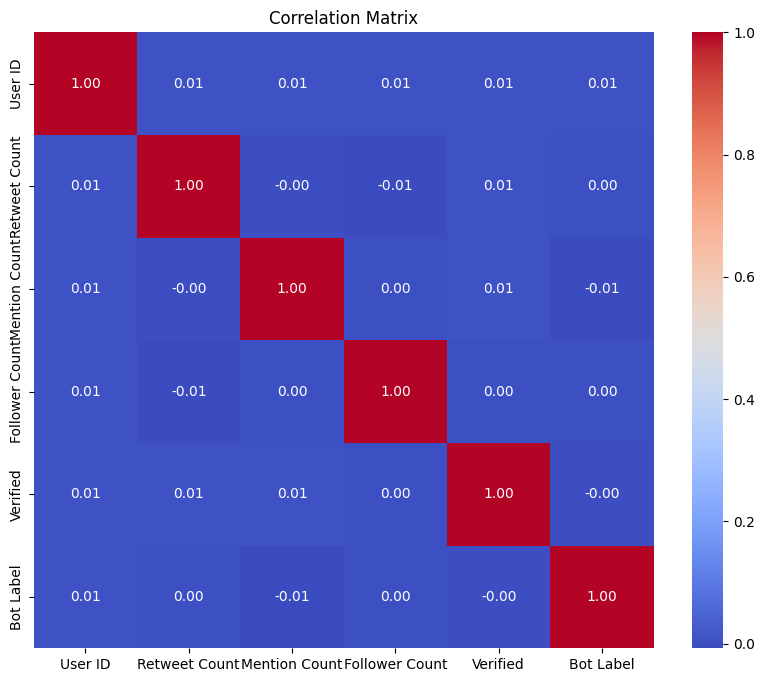

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## TEXT ANALYSIS

### Initial dataframe

In [28]:
data.head()

,User ID,Username,Tweet,Retweet Count,Mention Count,Follower Count,Verified,Bot Label,Location,Created At,Hashtags
0,132131,flong,Station activity person against natural majori...,85,1,2353,False,1,Adkinston,2020-05-11 15:29:50,
1,289683,hinesstephanie,Authority research natural life material staff...,55,5,9617,True,0,Sanderston,2022-11-26 05:18:10,both live
2,779715,roberttran,Manage whose quickly especially foot none to g...,6,2,4363,True,0,Harrisonfurt,2022-08-08 03:16:54,phone ahead
3,696168,pmason,Just cover eight opportunity strong policy which.,54,5,2242,True,1,Martinezberg,2021-08-14 22:27:05,ever quickly new I
4,704441,noah87,Animal sign six data good or.,26,3,8438,False,1,Camachoville,2020-04-13 21:24:21,foreign mention


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   User ID         50000 non-null  int64         
 1   Username        50000 non-null  object        
 2   Tweet           50000 non-null  object        
 3   Retweet Count   50000 non-null  int64         
 4   Mention Count   50000 non-null  int64         
 5   Follower Count  50000 non-null  int64         
 6   Verified        50000 non-null  bool          
 7   Bot Label       50000 non-null  int64         
 8   Location        50000 non-null  object        
 9   Created At      50000 non-null  datetime64[ns]
 10  Hashtags        50000 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(5), object(4)
memory usage: 3.9+ MB


In [30]:
data.isna().sum()

User ID           0
Username          0
Tweet             0
Retweet Count     0
Mention Count     0
Follower Count    0
Verified          0
Bot Label         0
Location          0
Created At        0
Hashtags          0
dtype: int64

### TEXT DATA PREPROCESSING

In [31]:
data_2 = data
data_2['Username'] = data_2['Username'].str.lower()
data_2['Tweet'] = data_2['Tweet'].str.lower() 
data_2['Hashtags'] = data_2['Hashtags'].str.lower()
data_2['Location'] = data_2['Location'].str.lower()

In [32]:
data_2['Tweet'] = data_2['Tweet'].str.translate(str.maketrans('', '', string.punctuation))
data_2['Hashtags'] = data_2['Hashtags'].str.translate(str.maketrans('', '', string.punctuation))

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/sush/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
data_2['Tokenized Tweet'] = data_2['Tweet'].apply(nltk.word_tokenize)

In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/sush/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
stop_words = set(stopwords.words('english'))

In [37]:
data_2['Tokenized Tweet'] = data_2['Tokenized Tweet'].apply(lambda x: [word for word in x if word not in stop_words])

In [38]:
stemmer = PorterStemmer()
data_2['Stemmed Tweet'] = data_2['Tokenized Tweet'].apply(lambda x: [stemmer.stem(word) for word in x]) 

In [39]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /home/sush/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [40]:
data_2['Lemmatized Tweet'] = data_2['Tokenized Tweet'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [41]:
data_2.head()

,User ID,Username,Tweet,Retweet Count,Mention Count,Follower Count,Verified,Bot Label,Location,Created At,Hashtags,Tokenized Tweet,Stemmed Tweet,Lemmatized Tweet
0,132131,flong,station activity person against natural majori...,85,1,2353,False,1,adkinston,2020-05-11 15:29:50,,"[station, activity, person, natural, majority,...","[station, activ, person, natur, major, none, s...","[station, activity, person, natural, majority,..."
1,289683,hinesstephanie,authority research natural life material staff...,55,5,9617,True,0,sanderston,2022-11-26 05:18:10,both live,"[authority, research, natural, life, material,...","[author, research, natur, life, materi, staff,...","[authority, research, natural, life, material,..."
2,779715,roberttran,manage whose quickly especially foot none to g...,6,2,4363,True,0,harrisonfurt,2022-08-08 03:16:54,phone ahead,"[manage, whose, quickly, especially, foot, non...","[manag, whose, quickli, especi, foot, none, go...","[manage, whose, quickly, especially, foot, non..."
3,696168,pmason,just cover eight opportunity strong policy which,54,5,2242,True,1,martinezberg,2021-08-14 22:27:05,ever quickly new i,"[cover, eight, opportunity, strong, policy]","[cover, eight, opportun, strong, polici]","[cover, eight, opportunity, strong, policy]"
4,704441,noah87,animal sign six data good or,26,3,8438,False,1,camachoville,2020-04-13 21:24:21,foreign mention,"[animal, sign, six, data, good]","[anim, sign, six, data, good]","[animal, sign, six, data, good]"


### Text EDA

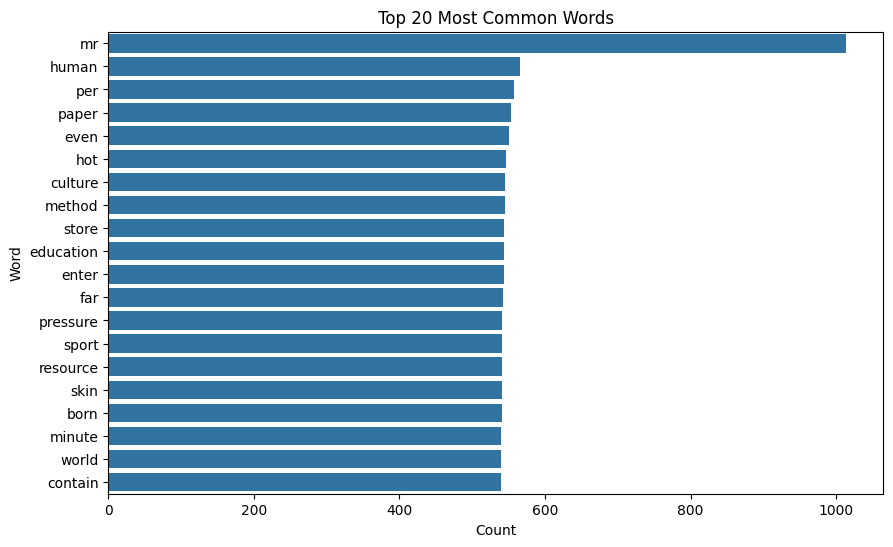

In [42]:
all_words = [word for tokens in data_2['Lemmatized Tweet'] for word in tokens]
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Word', data=common_words_df)
plt.title('Top 20 Most Common Words')
plt.show()

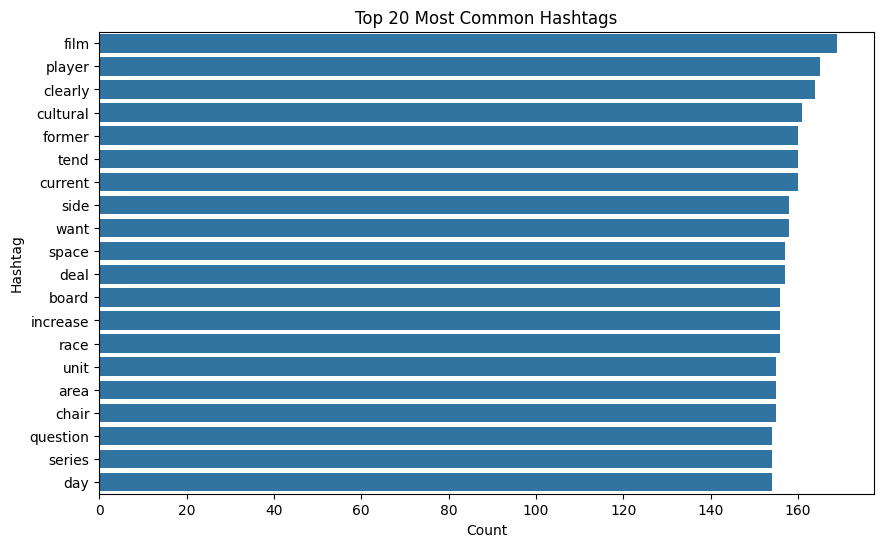

In [43]:
data_2['Hashtags'] = data_2['Hashtags'].str.split()
all_hashtags = [hashtag for sublist in data_2['Hashtags'].dropna() for hashtag in sublist]
hashtag_freq = Counter(all_hashtags)
common_hashtags = hashtag_freq.most_common(20)

common_hashtags_df = pd.DataFrame(common_hashtags, columns=['Hashtag', 'Count'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Hashtag', data=common_hashtags_df)
plt.title('Top 20 Most Common Hashtags')
plt.show()

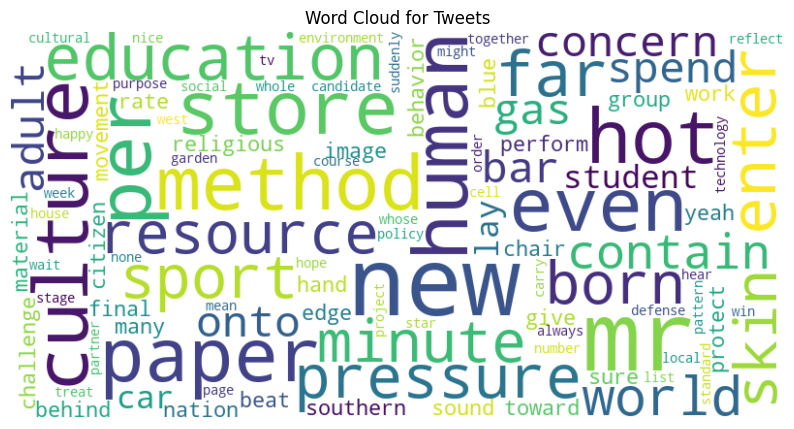

In [44]:
from wordcloud import WordCloud
tweet_words = ' '.join([text for text in data_2['Tweet']])
wordcloud = WordCloud(width=800, height=400, max_font_size=100, max_words=100, background_color='white').generate(tweet_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Tweets')
plt.show()

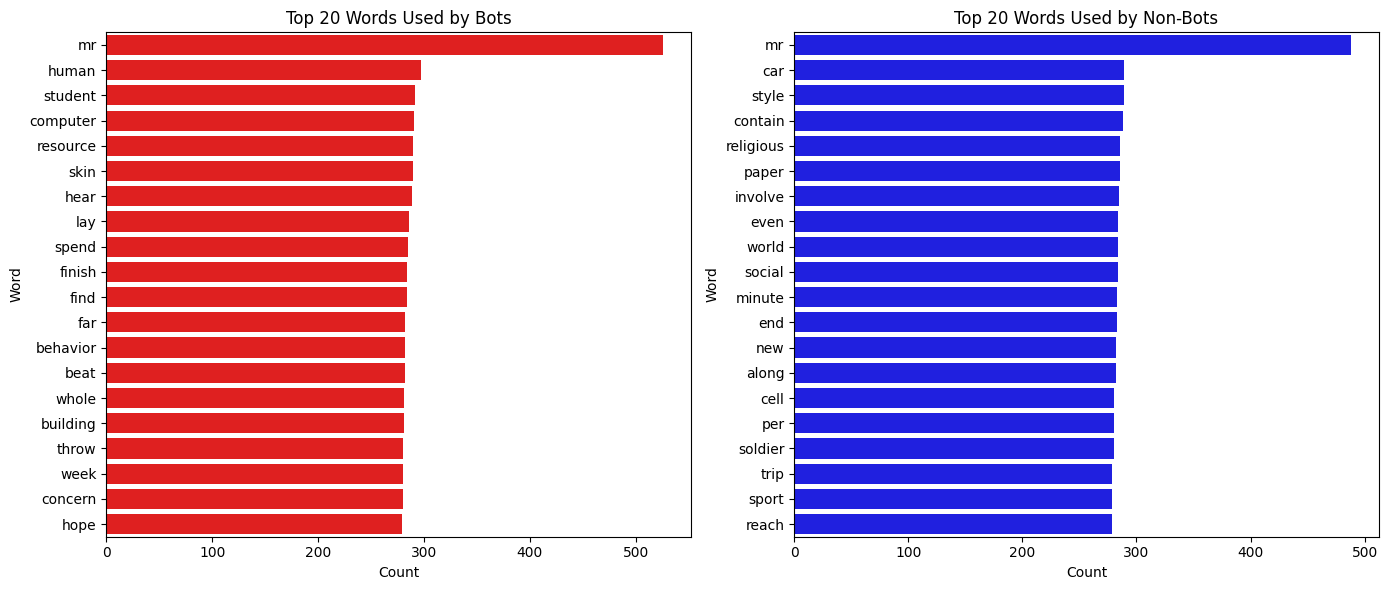

In [48]:

bot_tweets = data_2[data_2['Bot Label'] == 1]['Lemmatized Tweet']
non_bot_tweets = data_2[data_2['Bot Label'] == 0]['Lemmatized Tweet']

bot_words = [word for tokens in bot_tweets for word in tokens]
non_bot_words = [word for tokens in non_bot_tweets for word in tokens]

bot_word_freq = Counter(bot_words)
non_bot_word_freq = Counter(non_bot_words)

bot_common_words_df = pd.DataFrame(bot_word_freq.most_common(20), columns=['Word', 'Count'])
non_bot_common_words_df = pd.DataFrame(non_bot_word_freq.most_common(20), columns=['Word', 'Count'])

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Count', y='Word', data=bot_common_words_df, color='red')
plt.title('Top 20 Words Used by Bots')

plt.subplot(1, 2, 2)
sns.barplot(x='Count', y='Word', data=non_bot_common_words_df, color='blue')
plt.title('Top 20 Words Used by Non-Bots')

plt.tight_layout()
plt.show()

In [49]:
bot_word_freq

Counter({'mr': 526,
         'human': 297,
         'student': 292,
         'computer': 291,
         'resource': 290,
         'skin': 290,
         'hear': 289,
         'lay': 286,
         'spend': 285,
         'finish': 284,
         'find': 284,
         'far': 282,
         'behavior': 282,
         'beat': 282,
         'whole': 281,
         'building': 281,
         'throw': 280,
         'week': 280,
         'concern': 280,
         'hope': 279,
         'ago': 279,
         'enter': 279,
         'opportunity': 278,
         'letter': 277,
         'happy': 277,
         'consumer': 277,
         'store': 277,
         'per': 277,
         'hot': 277,
         'culture': 276,
         'gun': 276,
         'environmental': 276,
         'blue': 275,
         'onto': 275,
         'citizen': 275,
         'good': 274,
         'edge': 274,
         'pressure': 274,
         'floor': 274,
         'experience': 274,
         'always': 274,
         'low': 274,
         'gen